In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
spotify = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HSE/spotify.csv')
spotify.head()

,Unnamed: 0,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,1040234854,3.710667
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,310083733,3.336217
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,63063467,3.585833
3,3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,434663559,3.897783
4,4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,617259738,5.682000


### **Гипотеза is_album**

В связи с тем, что альбомы (а также отдельные треки, входящие в них) и синглы имеют разные виды продвижения, можем предположить, что на число стримов влияет данный параметр ("album_type"). Чаще всего альбомы имеют большее продвижение среди слушателей, чем синглы, поэтому также предположим, что у треков, входящих в альбомы, число стримов будет выше.

Влияние типа альбома на число стримов будем проверять с помощью одного из статистических тестов, а предположение о более высоких значениях целевой переменной у альбомных треков - с помощью визуализации.

Проверка гипотезы: число стримов у треков, входящих в альбом, и треков, выпущенных синглом, различается.

```
H_0: Число стримов (stream) для треков, входящих в альбом = число стримов (stream) для треков, выпущенных синглом
H_1: Число стримов (stream) для треков, входящих в альбом ≠ число стримов (stream) для треков, выпущенных синглом
alpha = 0.05
```

In [ ]:
album = spotify[spotify['album_type']=='album']
single = spotify[spotify['album_type']=='single']

Чтобы понять, какой статистический тест нам нужно использовать для проверки гипотезы, проверим наши данные на нормальность с помощью критерия Шапиро — Уилка, а также сравним их дисперсии с помощью критерия Левене.

In [ ]:
alpha = 0.05
shapiro_test_album = st.shapiro(album['stream'])
print(shapiro_test_album)
if shapiro_test_album.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о нормальном распределении данных')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально')

ShapiroResult(statistic=np.float64(0.5661743990747901), pvalue=np.float64(1.3226678648552306e-101))
Отвергаем нулевую гипотезу о нормальном распределении данных


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13312.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
shapiro_test_single = st.shapiro(single['stream'])
print(shapiro_test_single)
if shapiro_test_single.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о нормальном распределении данных')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально')

ShapiroResult(statistic=np.float64(0.5072123576654208), pvalue=np.float64(3.945023009314876e-78))
Отвергаем нулевую гипотезу о нормальном распределении данных


In [ ]:
levene = st.levene(album['stream'], single['stream'])
print(levene)
if levene.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве дисперсий')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Дисперсии в двух выборках не имеют значимых различий')

LeveneResult(statistic=np.float64(102.4185896144263), pvalue=np.float64(5.2128504286125e-24))
Отвергаем нулевую гипотезу о равенстве дисперсий


Оценка критериев показала, что наши данные не имеют нормального распределения, а их дисперсии не равны, значит, нам нужно использовать непараметрический тест - возьмем критерий Манна-Уитни.

In [ ]:
results = st.mannwhitneyu(album['stream'], single['stream'])
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве числа стримов')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3807501635363662e-123
Отвергаем нулевую гипотезу о равенстве числа стримов


Критерий Манна-Уитни подтвердил наше предположение о влияние типа альбома на число стримов. Теперь с помощью визуализации посмотрим, действительно ли у альбомных треков число стримов выше.

<ipython-input-9-56d90040b7d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(spotify, x='stream', y='album_type', palette='Dark2')


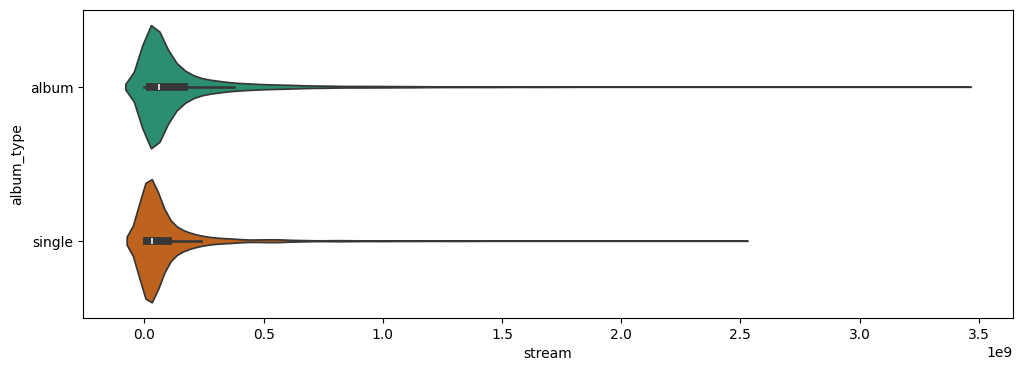

In [ ]:
plt.figure(figsize=(12,4))
sns.violinplot(spotify, x='stream', y='album_type', palette='Dark2')
plt.show()

In [ ]:
album['stream'].describe()

,stream
count,1.331200e+04
mean,1.579841e+08
std,2.677421e+08
min,1.669100e+04
25%,2.327385e+07
50%,6.124073e+07
75%,1.643355e+08
max,3.386520e+09


In [ ]:
single['stream'].describe()

,stream
count,4.656000e+03
mean,1.028792e+08
std,2.014803e+08
min,6.574000e+03
25%,9.244702e+06
50%,3.330787e+07
75%,1.004736e+08
max,2.456205e+09


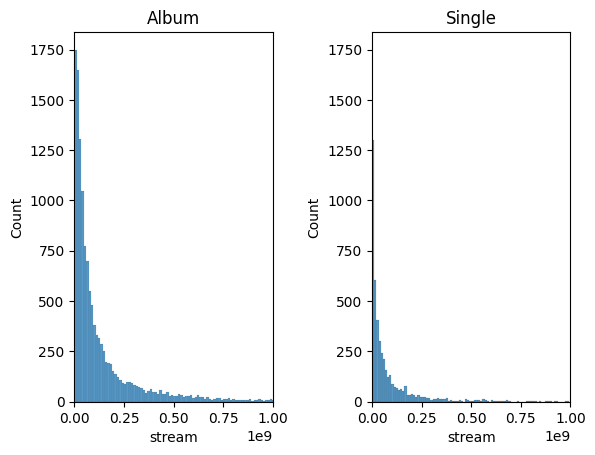

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(data=album, x="stream")
plt.title('Album')
plt.xlim(0, 1000000000)

y1 = plt.gca().get_ylim()[1]

plt.subplot(1, 2, 2)
sns.histplot(data=single, x="stream")
plt.title('Single')
plt.xlim(0, 1000000000)

plt.ylim(0, y1)

plt.subplots_adjust(wspace=0.5)

plt.show()

Мы видим, что у альбомных треков медианное значение числа стримов выше, чем у синглов, также у них шире диапазон значений для целевой переменной. А гистограммы помогают понять, что при увеличении числа стримов количество треков у синглов снижается быстрее, чем у альбомных треков.

**Вывод:** Критерий Манна-Уитни подтвердил наше предположение о том, что на число стримов влияет тип альбома (альбомный трек или сингл). А визуализация показала, что мы можем говорить про более высокие показатели числа стримов у альбомных треков.

## Гипотеза is_feat

Заметим, что в нашем датасете есть много совместных треков, которые обозначаются через feat. в поле `track`. Можем предположить, что из-за самого факта наличия приглашённого артиста на треке прослушиваний будет больше, так как артисты таким образом обмениваются аудиториями: аудитория основного артиста узнаёт о приглашённом и наоборот. Тогда среднее количество прослушиваний совместных треков гипотетически будет больше, чем сольных.

Проверим гипотезу о наличии взаимосвязи между фактом присутствия приглашённого артиста на треке и количеством прослушиваний.

Нулевая гипотеза: нет связи между фактом наличия приглашённого артиста в треке и количеством прослушиваний.

Альтернативная гипотеза: есть связь между фактом наличия приглашённого артиста в треке и количеством прослушиваний.

Найдём все способы обозначений приглашённого артиста.

In [ ]:
spotify[spotify.track.str.contains('feat.', regex=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,63063467,3.585833
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,4,-7.185,0.0629,0.01200,0.262000,0.3250,0.358,127.030,10666154,4.569033
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,11,-5.886,0.0313,0.00799,0.081000,0.1120,0.462,140.158,159605929,3.492667
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,2,-3.340,0.0465,0.00343,0.103000,0.3250,0.643,120.012,42671901,3.562500
27,50 Cent,Is This Love ('09) (feat. 50 Cent),Curtain Call 2,album,0.853,0.776,8,-4.221,0.2610,0.07140,0.000000,0.1810,0.659,94.028,28529840,3.533550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17582,Gazo,BODIES (feat. Damso),KMT,album,0.906,0.518,1,-7.104,0.1800,0.00864,0.001740,0.0711,0.259,146.060,25492899,2.772883
17583,Gazo,MAUVAIS 2X (feat. Ninho),MAUVAIS 2X (feat. Ninho),single,0.736,0.666,0,-7.851,0.2550,0.36000,0.000000,0.0881,0.744,138.656,51663165,4.006217
17672,MEDUZA,Bad Memories (feat. Elley Duhé & FAST BOY),Bad Memories (feat. Elley Duhé & FAST BOY),single,0.607,0.767,5,-6.069,0.0474,0.11800,0.000000,0.1220,0.662,123.998,149174546,2.477150
17673,MEDUZA,Paradise (feat. Dermot Kennedy),Paradise,single,0.632,0.595,8,-7.644,0.0401,0.06890,0.000000,0.2090,0.435,124.114,601107554,2.798383


In [ ]:
spotify[spotify.track.str.contains('ft.', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
205,2Pac,All Eyez On Me (ft. Big Syke),All Eyez On Me,album,0.872,0.723,1,-5.968,0.2470,0.0293,0.000000,0.3270,0.843,93.279,428728611,5.129550
209,2Pac,2 Of Amerikaz Most Wanted (ft. Snoop Doggy Dogg),All Eyez On Me,album,0.849,0.904,8,-4.780,0.1380,0.0248,0.000051,0.0545,0.854,99.258,178709066,4.108883
303,21 Savage,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,album,0.849,0.424,5,-9.579,0.3240,0.0635,0.000000,0.0834,0.153,145.887,501420741,4.049433
3045,Los Auténticos Decadentes,Loco (Tu Forma de Ser) [Ft. Rubén Albarrán] - ...,Fiesta Nacional (Mtv Unplugged),album,0.587,0.639,7,-8.065,0.0357,0.3950,0.000000,0.6800,0.789,116.499,148463447,4.155117
3047,Los Auténticos Decadentes,Amor (Ft. Mon Laferte) - MTV Unplugged,Fiesta Nacional (Mtv Unplugged),album,0.620,0.717,9,-7.165,0.0361,0.0274,0.000000,0.7080,0.601,92.881,122943312,5.208533
7243,Damian Marley,"Medication (ft. Stephen Marley, Wiz Khalifa, T...",Medication (Remix),single,0.813,0.585,10,-6.856,0.2660,0.0223,0.000000,0.2100,0.847,84.995,35643208,4.085783
7835,Rick Ross,Money In The Grave (Drake ft. Rick Ross),The Best In The World Pack,single,0.831,0.502,10,-4.045,0.0460,0.1010,0.000000,0.1220,0.101,100.541,826816158,3.423783
9392,Ñengo Flow,La Llevo Al Cielo (Ft. Ñengo Flow),La Llevo Al Cielo (Ft. Ñengo Flow),single,0.795,0.845,9,-3.809,0.1350,0.1050,0.000011,0.1720,0.769,170.023,261092249,4.248667
9971,Steve Aoki,New York ft. mazie,New York ft. mazie,single,0.409,0.760,6,-5.291,0.2640,0.2860,0.000003,0.0807,0.601,103.909,2270706,2.203800
11253,Drake,Knife Talk (with 21 Savage ft. Project Pat),Certified Lover Boy,album,0.849,0.424,5,-9.579,0.3240,0.0635,0.000000,0.0834,0.153,145.887,501420741,4.049433


In [ ]:
spotify[spotify.track.str.contains('(with', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
121,Pharrell Williams,"Stay With Me (with Justin Timberlake, Halsey &...",Funk Wav Bounces Vol. 2,album,0.810,0.733,9,-6.338,0.0444,0.27600,0.000007,0.2880,0.900,125.975,99934776,3.821383
127,Khalid,lovely (with Khalid),lovely (with Khalid),single,0.351,0.296,4,-10.109,0.0333,0.93400,0.000000,0.0950,0.120,115.284,2110573779,3.336433
131,Khalid,Eastside (with Halsey & Khalid),FRIENDS KEEP SECRETS,album,0.632,0.686,6,-7.665,0.2430,0.54900,0.000000,0.2000,0.329,89.949,1424962511,2.846167
136,Khalid,Love Lies (with Normani),Love Lies (with Normani),single,0.708,0.648,6,-5.626,0.0449,0.09560,0.000000,0.1340,0.338,143.955,843423744,3.361783
146,Machine Gun Kelly,my ex's best friend (with blackbear),Tickets To My Downfall,album,0.731,0.675,5,-5.134,0.0434,0.00473,0.000000,0.1410,0.298,124.939,574531280,2.324350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17840,BoyWithUke,Sick of U (with Oliver Tree),Sick of U,single,0.676,0.814,0,-3.213,0.0585,0.27700,0.000000,0.0953,0.601,92.554,44129835,2.811267
17843,BoyWithUke,IDGAF (with blackbear),Serotonin Dreams,album,0.782,0.728,5,-5.930,0.0768,0.42700,0.000000,0.2500,0.876,97.975,152547498,2.344450
17848,BoyWithUke,Prairies (with mxmtoon),Serotonin Dreams,album,0.717,0.700,1,-5.843,0.0382,0.18900,0.000000,0.3740,0.568,103.517,21156648,3.199550
17872,Silk Sonic,After Last Night (with Thundercat & Bootsy Col...,An Evening With Silk Sonic,album,0.651,0.703,0,-8.958,0.0816,0.02970,0.000000,0.0608,0.647,140.051,94525595,4.157400


In [ ]:
spotify[spotify.artist.str.contains(',', regex=False, case=False)]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
1345,"Earth, Wind & Fire",Let's Groove,Raise!,album,0.869,0.648,11,-8.698,0.0633,0.12100,0.000022,0.1260,0.900,125.035,430077729,5.655333
1346,"Earth, Wind & Fire",Boogie Wonderland,I Am,album,0.802,0.756,2,-10.791,0.0349,0.08430,0.007650,0.0521,0.963,131.715,343817778,4.804883
1347,"Earth, Wind & Fire",After the Love Has Gone,I Am,album,0.424,0.443,6,-13.450,0.0382,0.53200,0.000389,0.6730,0.391,131.675,112553060,4.634000
1348,"Earth, Wind & Fire",Shining Star,That's The Way Of The World,album,0.676,0.692,9,-13.093,0.0520,0.66800,0.009150,0.1300,0.799,102.516,82024994,2.836000
1349,"Earth, Wind & Fire","September - from DreamWorks Animation's ""TROLLS""",TROLLS (Original Motion Picture Soundtrack),album,0.774,0.849,9,-2.986,0.0301,0.01600,0.000199,0.0348,0.962,126.996,73117976,3.916667
1350,"Earth, Wind & Fire",Beijo (Interlude),All 'N All,album,0.841,0.752,11,-11.165,0.0898,0.24800,0.006800,0.1050,0.549,112.362,8234500,1.335783
1351,"Earth, Wind & Fire",Fantasy,All 'N All,album,0.608,0.745,4,-8.772,0.0857,0.32300,0.004280,0.1350,0.614,88.941,23604673,4.623550
1352,"Earth, Wind & Fire",In the Stone,I Am,album,0.656,0.662,4,-10.346,0.0493,0.09640,0.000612,0.0853,0.717,114.612,25001079,4.808000
4708,"Hank Williams, Jr.",Family Tradition,Family Tradition,album,0.660,0.523,4,-12.068,0.0608,0.02380,0.000000,0.1420,0.794,126.342,121920128,4.049333
4709,"Hank Williams, Jr.",A Country Boy Can Survive,The Pressure Is On,album,0.688,0.459,7,-9.353,0.0365,0.14400,0.000000,0.0816,0.493,75.184,128648571,4.250000


Видим, что в нашем датасете приглашённые артисты как правило указываются в названии трека через варианты сокращений слова featuring (от англ. "с участием"): "feat." и "ft.".

Также в ряде случаев приглашённый артист указывается через "with", однако само по себе слово "with" в английском языке может быть использовано в разных контекстах, а не только как обозначение приглашённого артиста, поэтому также заметим, что приглашённый артист через "with" обычно прописывается в скобках.

Основываясь на найденных закономерностях, добавим в наш датасет поле `is_feat`, которое будет принимать значения 0 либо 1 в зависимости от наличия приглашённого артиста в песне.

In [ ]:
condition = (spotify['track'].str.contains('feat.', regex=False, case=False)
             | spotify['track'].str.contains('ft.', regex=False, case=False)
             | spotify['track'].str.contains('(with', regex=False, case=False))

spotify['is_feat'] = condition.astype(int)

spotify[spotify.is_feat == 1]

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min,is_feat
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,63063467,3.585833,1
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,4,-7.185,0.0629,0.01200,0.262000,0.3250,0.358,127.030,10666154,4.569033,1
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,11,-5.886,0.0313,0.00799,0.081000,0.1120,0.462,140.158,159605929,3.492667,1
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,2,-3.340,0.0465,0.00343,0.103000,0.3250,0.643,120.012,42671901,3.562500,1
27,50 Cent,Is This Love ('09) (feat. 50 Cent),Curtain Call 2,album,0.853,0.776,8,-4.221,0.2610,0.07140,0.000000,0.1810,0.659,94.028,28529840,3.533550,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17843,BoyWithUke,IDGAF (with blackbear),Serotonin Dreams,album,0.782,0.728,5,-5.930,0.0768,0.42700,0.000000,0.2500,0.876,97.975,152547498,2.344450,1
17848,BoyWithUke,Prairies (with mxmtoon),Serotonin Dreams,album,0.717,0.700,1,-5.843,0.0382,0.18900,0.000000,0.3740,0.568,103.517,21156648,3.199550,1
17872,Silk Sonic,After Last Night (with Thundercat & Bootsy Col...,An Evening With Silk Sonic,album,0.651,0.703,0,-8.958,0.0816,0.02970,0.000000,0.0608,0.647,140.051,94525595,4.157400,1
17919,Arcane,Enemy (with JID) - from the series Arcane Leag...,Mercury - Acts 1 & 2,album,0.728,0.783,11,-4.424,0.2660,0.23700,0.000000,0.4340,0.555,77.011,1046179886,2.889683,1


Итого 1987 треков с хотя бы одним приглашённым артистом в датасете. Изучим распределения двух групп.

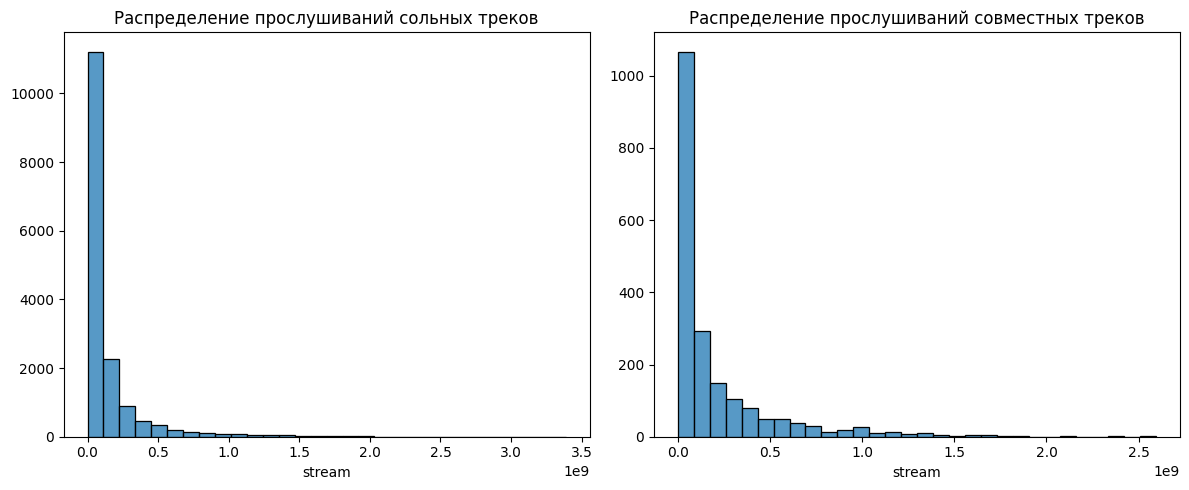

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=spotify[spotify['is_feat'] == 0], x='stream', bins=30, ax=ax[0])
ax[0].set_title('Распределение прослушиваний сольных треков')
ax[0].set_xlabel('stream')
ax[0].set_ylabel('')

sns.histplot(data=spotify[spotify['is_feat'] == 1], x='stream', bins=30, ax=ax[1])
ax[1].set_title('Распределение прослушиваний совместных треков')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Видим, что распределения не являются нормальными. Проверим размеры выборок.

In [ ]:
spotify[spotify['is_feat'] == 0].shape[0]

15981

In [ ]:
spotify[spotify['is_feat'] == 1].shape[0]

1987

Поскольку размеры обеих выборок превышают 30 наблюдений, согласно ЦПТ, мы можем применять t-тест без строгой проверки нормальности распределений — выборочные средние будут иметь приблизительно нормальное распределение независимо от формы исходных распределений.

Также проверим равенство дисперсий.

In [ ]:
np.var(spotify[spotify['is_feat'] == 0].stream)

5.9068853853442376e+16

In [ ]:
np.var(spotify[spotify['is_feat'] == 1].stream)

1.0101224930554363e+17

Дисперсии двух групп неравны, поэтому проведём двухвыборочный t-тест Уэлча для сравнения средних.

In [ ]:
results = st.ttest_ind(spotify[spotify['is_feat'] == 1].stream,
                       spotify[spotify['is_feat'] == 0].stream, equal_var=False)

print(f"{results.pvalue:.4f}")

0.0000


p-value < 0.05, следовательно средние групп совместных и сольных треков имеют стат. значимые различия.

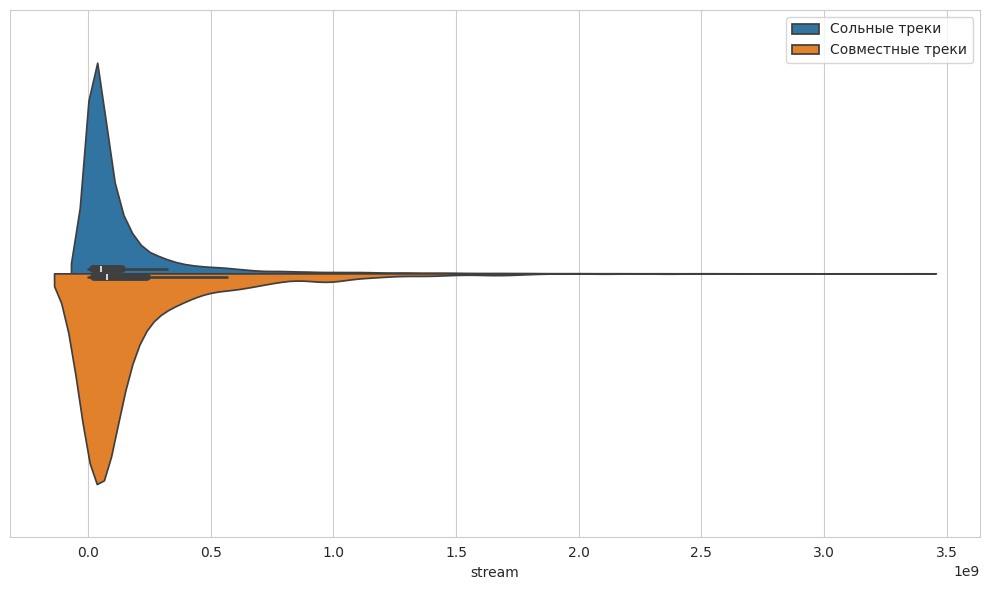

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.violinplot(data=spotify, x='stream', hue='is_feat', split=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Сольные треки', 'Совместные треки'])

plt.tight_layout()
plt.show()

Видим, что группы средних пересекаются, однако у совместных треков присутствует продолжительный хвост справа, за счёт которого и появляется статистичиски значимая разница между средними этих групп. Проверим абсолютные значения средних.

In [ ]:
print("Среднее для is_feat=1:", spotify[spotify['is_feat'] == 1].stream.mean())
print("Среднее для is_feat=0:", spotify[spotify['is_feat'] == 0].stream.mean())

Среднее для is_feat=1: 207036871.41217917
Среднее для is_feat=0: 135830489.9405544


Вывод: среднее число прослушиваний треков с приглашённым артистом статистически значимо выше, чем у сольных треков. Проверим коэффициент корреляции для выявления факта взаимосвязи между этими факторами.

In [ ]:
r, p_value = st.pointbiserialr(spotify['is_feat'], spotify['stream'])

print(f"Корреляция: {r:.3f}, p-value: {p_value:.4f}")

Корреляция: 0.088, p-value: 0.0000


p-value < 0.05, следовательно отклоняем нулевую гипотезу и принимаем альтернативную: есть связь между фактом наличия приглашённого артиста в треке и количеством прослушиваний. Связь слабая (0.088) со знаком +. Возможно, носит нелинейный характер.

## Гипотеза combination

Во второй части исследования мы предположили, что одним из вариантов гипотезы можно рассмотреть корреляцию между связками параметров и влиянием на количество стримов. Наша задача понять, увеличится ли корреляция между параметрами и стримами, если мы будем брать связку параметров.

Ранее, когда мы проверяли корреляцию попарно - количество стримов с каждой перемнной - то самое высокое значение корреляции было 0.11 с переменной loudness.

Для начала посмотрим, между какими комбинациями параметров в целом есть связь с количеством стримов. Ранее в п.2.7.2 мы уже проверяли попарную корреляцию между параметрами и стримами, но делали это по раздельности с каждым параметром.

Мы уже прологарифмировали целевую переменную stream и отобрали список числовых параметров (без stream и stream_log):

In [ ]:
num_cols

['danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_min']

Выведем зависимости между комбинацией переменных и стримов. Будем проверять корреляцию признаков через произведение и сумму.

Сделаем это для выявления потенциальных взаимодействий между признаками, которые могут не улавливаться при рассмотрении признаков по отдельности.

Рассмотрим произведение и сумму ввиду следующих особенностей:

Произведение (для поиска мультипликативных взаимодействий)

1) Когда мы перемножаем два признака, мы создаем новый признак, значение которого становится большим, только если оба исходных признака имеют высокие значения. Если один из признаков имеет низкое значение, то и произведение будет низким, независимо от значения другого признака.

2) Произведение позволяет моделировать ситуации, когда совместное влияние двух признаков на целевую переменную ('stream_log') отличается от суммы их индивидуальных влияний.

Сумма (для поиска аддитивных взаимодействий или простого комбинирования):

1) Суммирование двух признаков создает новый признак, значение которого увеличивается, если хотя бы один из исходных признаков имеет высокое значение.

Применение этих двух процессов может дать модели больше информации о сложных взаимосвязях в данных и помочь лучше понять закономерности и сделать более точные прогнозы.


In [ ]:
#импортируем нужную библиотеку

import itertools

In [ ]:
# создадим словарь для хранения результатов через произведение
correlations_mult = []

# перебираем все возможные пары параметров
for feat1, feat2 in itertools.combinations(num_cols, 2):

    #cоздаем комбинацию параметров
    spotify_numeric[f'{feat1}_x_{feat2}'] = spotify_numeric[feat1] * spotify_numeric[feat2]

    #вычисляем корреляцию с логарифмом стримов
    corr_value = spotify_numeric[f'{feat1}_x_{feat2}'].corr(spotify_numeric['stream_log'])

    # применяем функцию
    correlations_mult.append({
        'parameter_pair': f'{feat1} x {feat2}',
        'correlation': corr_value
    })

    #удаляем временный столбец
    spotify_numeric.drop(f'{feat1}_x_{feat2}', axis=1, inplace=True)

In [ ]:
# создадим словарь для хранения результатов через сумму
correlations_sum = []

# перебираем все возможные пары параметров
for feat1, feat2 in itertools.combinations(num_cols, 2):

    #cоздаем комбинацию параметров
    spotify_numeric[f'{feat1}_plus_{feat2}'] = spotify_numeric[feat1] + spotify_numeric[feat2]

    #вычисляем корреляцию с логарифмом стримов
    corr_value = spotify_numeric[f'{feat1}_plus_{feat2}'].corr(spotify_numeric['stream_log'])

    # применяем функцию
    correlations_sum.append({
        'parameter_pair': f'{feat1} + {feat2}',
        'correlation': corr_value
    })

    #удаляем временный столбец
    spotify_numeric.drop(f'{feat1}_plus_{feat2}', axis=1, inplace=True)

In [ ]:
#запишем полученные результаты умножения в датафрейм и отсортируем по абсолютному значению корреляции
correlation_data_mul = pd.DataFrame(correlations_mult)
correlation_data_mul['abs_correlation'] = correlation_data_mul['correlation'].abs()
correlation_data_mul.sort_values('abs_correlation', ascending=False, inplace=True)

In [ ]:
#возьмем ТОП-10 комбинаций с умножением

print('Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов:')
correlation_data_mul.head(10).reset_index(drop=True)

Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов:


,parameter_pair,correlation,abs_correlation
0,loudness x acousticness,0.132519,0.132519
1,loudness x instrumentalness,0.125155,0.125155
2,instrumentalness x tempo,-0.123897,0.123897
3,acousticness x instrumentalness,-0.119826,0.119826
4,danceability x instrumentalness,-0.117467,0.117467
5,loudness x tempo,0.116352,0.116352
6,key x instrumentalness,-0.111951,0.111951
7,instrumentalness x liveness,-0.109260,0.109260
8,speechiness x instrumentalness,-0.107538,0.107538
9,instrumentalness x duration_min,-0.106139,0.106139


In [ ]:
#запишем полученные результаты сложения в датафрейм и отсортируем по абсолютному значению корреляции
correlation_data_sum = pd.DataFrame(correlations_sum)
correlation_data_sum['abs_correlation'] = correlation_data_sum['correlation'].abs()
correlation_data_sum.sort_values('abs_correlation', ascending=False, inplace=True)

In [ ]:
#возьмем ТОП-10 комбинаций сложения

print('Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов:')
correlation_data_sum.head(10).reset_index(drop=True)

Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов:


,parameter_pair,correlation,abs_correlation
0,loudness + duration_min,0.152255,0.152255
1,acousticness + instrumentalness,-0.146654,0.146654
2,danceability + loudness,0.139265,0.139265
3,loudness + speechiness,0.138278,0.138278
4,loudness + liveness,0.137351,0.137351
5,loudness + acousticness,0.136761,0.136761
6,energy + loudness,0.136640,0.136640
7,loudness + instrumentalness,0.136610,0.136610
8,loudness + valence,0.136369,0.136369
9,speechiness + instrumentalness,-0.135399,0.135399


Самые высокие креляции получились методом сложения, поэтому далее будем работать с результатами этого метода.

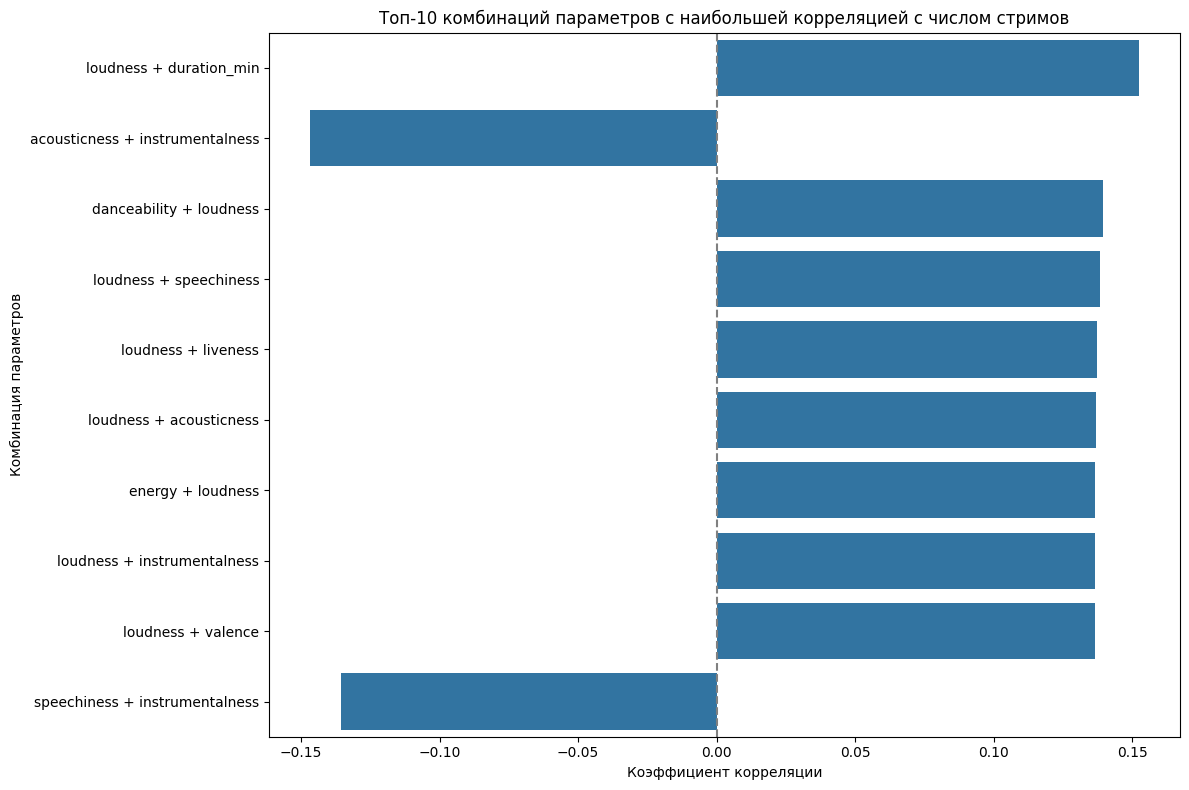

In [ ]:
# визуализируем топ-10 комбинаций параметров с наибольшей корреляцией

plt.figure(figsize=(12, 8))
sns.barplot(x='correlation', y='parameter_pair', data=correlation_data_sum.head(10))
plt.title('Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Комбинация параметров')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

**На основе проведенного анализа мы можем сделать следующие выводы:**

1) Комбинации параметров имеют более сильную корреляцию с числом стримов, чем отдельные параметры. Значения коэффициентов корреляции для ТОП-10 комбинаций параметров (0.13-0.15) выше, чем для отдельных параметров (ранее не более 0.11).

2) Наиболее значимой оказалась комбинация loudness + duration_min с коэффициентом корреляции 0.15. Это довольно интересное наблюдение, так как по отдельности эти параметры показывали более слабую корреляцию со стримами (0.11 и 0.02 соответственно). Можно предположить, что слушатели предпочитают достаточно продолжительные и при этом громкие, хорошо сведенные треки.

3) Параметр loudness чаще всего коррелирует с другими параметрами (7 из 10). Это может говорить о том, что техническое качество звучания трека важно для его успеха.

4) Большинство комбинаций используют суммирование параметров, а не их произведение, что может указывать на то, что при построении модели прогнозирования стоит рассматривать именно линейные комбинации параметров.

5) Большинство комбинаций имеет положительную корреляцию, что указывает на то, что определенные пары параметров действительно могут усиливать потенциал популярности трека.

6) Параметры speechiness и instrumentalness в комбинации показывают отрицательную корреляцию (-0.14), что может указывать на низкую популярность треков, которые сочетают разговорную речь и инструментальность.

*Теперь проведем статистический анализ полученных результатов.*

Для проверки статистической значимости выявленных корреляций возьмем тест Пирсона. Этот тест позволяет определить, является ли наблюдаемая корреляция результатом случайности или действительно отражает существующую в генеральной совокупности взаимосвязь.

Также использование теста Пирсона является стандартным способом оценки линейной корреляции между непрерывными признаками и определения статистической значимости этой корреляции. А как мы ранее выявили, большинство комбинаций имеют максимальное значение через суммирование, а значит имеют линейную связь. Тест Пирсона позволяет выявить, какие из созданных комбинаций признаков имеют значимую линейную связь с логарифмом количества прослушиваний, что может быть полезно для дальнейшего построения модели.

Порог значимости установим на уровне 0.05, что является общепринятым стандартом в статистических исследованиях.

Возьмем следующие нулевую и альтернативную гипотезы:

- **H0 (нулевая гипотеза)** - корреляция между комбинацией параметров и числом стримов равна 0 (отсутствует).

- **H1 (альтернативная гипотеза)** - корреляция между комбинацией параметров и числом стримов не равна 0 (существует).

In [ ]:
#импортируем библиотеку

import scipy.stats as stats

In [ ]:
# возьмем функцию для расчета p-значения для коэффициента корреляции Пирсона
def calculate_pvalue(r, n):

    # рассчитываем t-статистику для корреляции
    t = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

    # рассчитываем p-значение (двустороннее)
    p = 2 * (1 - stats.t.cdf(abs(t), n - 2))
    return p

In [ ]:
# вычисляем размер выборки

size = len(spotify_numeric)
size

18964

In [ ]:
# добавим p-значения к нашим результатам
correlation_data_sum['p_value'] = correlation_data_sum['correlation'].apply(
    lambda r: calculate_pvalue(r, size)
)

In [ ]:
# добавим статистическую значимость (при p < 0.05)
correlation_data_sum['significant'] = correlation_data_sum['p_value'] < 0.05

In [ ]:
# выведем результаты для топ-10 комбинаций

print('Статистический анализ топ-10 комбинаций параметров:')
result = correlation_data_sum.head(10)[['parameter_pair', 'correlation', 'p_value', 'significant']]
result['p_value'] = result['p_value'].apply(lambda p: f"{p:.10f}")
result.reset_index(drop = True)

Статистический анализ топ-10 комбинаций параметров:


,parameter_pair,correlation,p_value,significant
0,loudness + duration_min,0.152255,0.0000000000,True
1,acousticness + instrumentalness,-0.146654,0.0000000000,True
2,danceability + loudness,0.139265,0.0000000000,True
3,loudness + speechiness,0.138278,0.0000000000,True
4,loudness + liveness,0.137351,0.0000000000,True
5,loudness + acousticness,0.136761,0.0000000000,True
6,energy + loudness,0.136640,0.0000000000,True
7,loudness + instrumentalness,0.136610,0.0000000000,True
8,loudness + valence,0.136369,0.0000000000,True
9,speechiness + instrumentalness,-0.135399,0.0000000000,True


**На основе проведенного статистического анализа можно сделать следующие выводы:**

1) Все выявленные в ТОП-10 корреляции являются статистически значимыми, поскольку p-значения для всех комбинаций параметров существенно меньше 0.05, а именно равны нулю.

2) Учитывая большой размер выборки (более 18 тыс. наблюдений), даже относительно небольшие значения корреляции (0.13-0.15) становятся статистически значимыми. Это объясняется тем, что в больших выборках легче обнаружить даже слабые эффекты с высокой степенью достоверности.

3) Несмотря на то, что величина корреляций относительно небольшая (0.13-0.15), их статистическая значимость указывает на то, что при построении прогностических моделей комбинации параметров могут быть полезными предикторами для числа стримов.

Таким образом, статистический анализ подтвердил исходную гипотезу о том, что существует статистически значимая зависимость между числом стримов и комбинациями музыкальных параметров, т.е. мы отклоняем нулевую гипотезу. Ранее, когда мы рассматривали параметры по одиночке, максимальная корреляция была 0.11, а в совокупности параметров - максимальная кореляция уже 0.15.

Возможно, комбинация 3-х и более параметров со стримами могла дать еще большую корреляцию.

## Гипотеза track_count

При анализе сгруппированного по артистам датасета была выявлена положительная корреляция между количеством средним количеством прослушиваний одного трека у артиста и количества треков у артиста.

Попробуем проверить гипотезу о положительном влиянии количества треков на прослушивания с помощью линейной регрессии логарифма количества прослушиваний на количество треков, и некоторые базовые характеристики композиций:

* **H0:** Количество треков не влияет на среднее количество прослушиваний трека
* **H1:** Влияние есть
   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
dfg = pd.read_csv('spotify_EDA_g.csv')

В сгруппированном датасете переменная track - количество треков у артиста, album - количество альбомов у артиста, остальные харакетиристики усредненные по количеству треков:

In [ ]:
dfg.head()

,Unnamed: 0,artist,track,album,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,stream,ln_stream
0,0,$NOT,10,7,0.758000,0.634300,6.100000,-7.297400,0.214700,0.259997,0.026274,0.199710,0.498050,117.551800,2.695383,1.127638e+08,18.540806
1,1,$uicideboy$,10,9,0.796600,0.683200,5.400000,-6.525800,0.141590,0.161158,0.000728,0.149230,0.337930,116.809000,2.734050,2.126748e+08,19.175275
2,2,(G)I-DLE,10,8,0.691400,0.815300,5.400000,-3.756900,0.096790,0.029762,0.000009,0.208640,0.476000,122.914300,3.151802,1.304212e+08,18.686280
3,3,*NSYNC,10,4,0.622400,0.769700,7.100000,-5.798000,0.057520,0.154031,0.000177,0.266430,0.687400,131.879900,3.925645,1.427834e+08,18.776839
4,4,070 Shake,9,7,0.575222,0.687333,3.111111,-6.526111,0.114878,0.065130,0.005138,0.124967,0.236278,126.649111,3.732509,4.503116e+07,17.622865


In [ ]:
X = dfg[['track', 'loudness', 'duration_min']].copy()
y = dfg['ln_stream'].copy()

X1 = sm.add_constant(X) # Добавляем константу, чтобы был свободный член
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_stream   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     42.56
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.14e-26
Time:                        22:43:54   Log-Likelihood:                -3020.8
No. Observations:                2028   AIC:                             6050.
Df Residuals:                    2024   BIC:                             6072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.6643      0.261     67.617   

При переменных track, loudness значимые коэффициенты:

* **При увеличении количества треков на 1 среднее количество прослушиваний растет на ~9%**
* **У артиста со средней громкостью треков большей на 1 дБ среднее количество прослушиваний трека выше на ~4.7%**
    
    *(нелинейная связь из-за того, что зависимая переменная это логарифм)*
    
Однако объясняющая сила модели крайне мала, исправленный R-квадрат на уровне 5.8% это очень маленькое значение.
Попробуем добавить в модель остальные переменные:

In [ ]:
X = dfg.drop(['Unnamed: 0', 'artist', 'ln_stream', 'stream', 'album'], axis = 1)
y = dfg['ln_stream'].copy()

X1 = sm.add_constant(X) # Добавляем константу, чтобы был свободный член
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_stream   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     29.76
Date:                Sat, 10 May 2025   Prob (F-statistic):           2.76e-63
Time:                        23:03:12   Log-Likelihood:                -2917.4
No. Observations:                2028   AIC:                             5861.
Df Residuals:                    2015   BIC:                             5934.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               21.7612      0.549  

R-квадрат вырос, однако все еще очень мал. При этом в модели возможно присутствует мультиколлинеарность. Построим корреляционную матрицу признаков:

<AxesSubplot:>

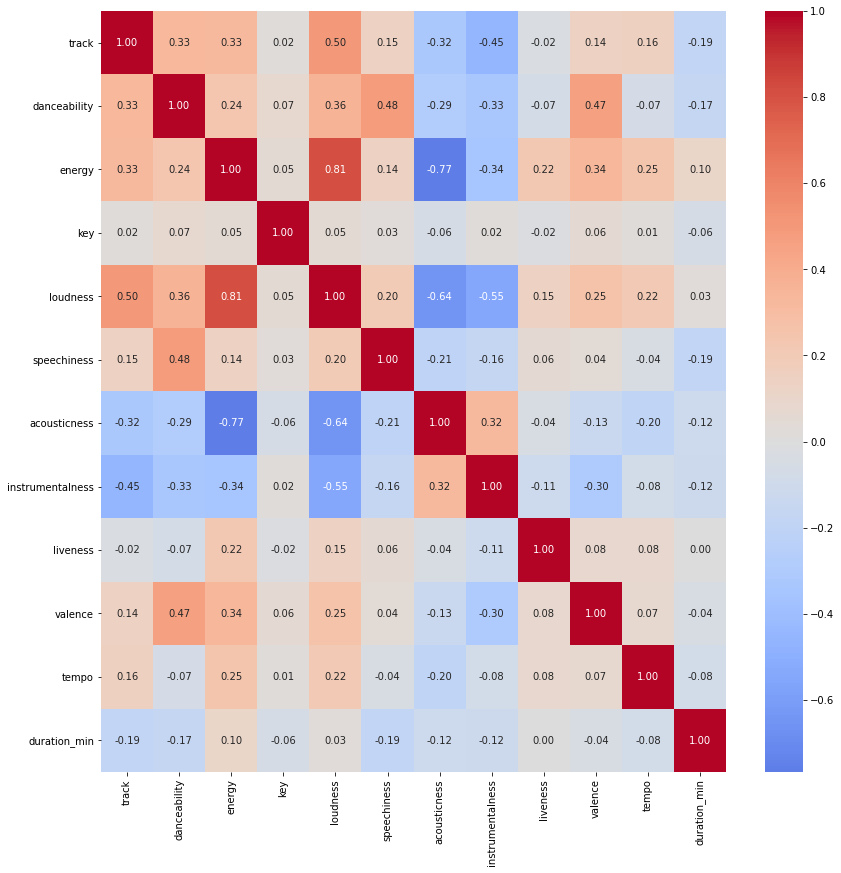

In [ ]:
plt.figure(figsize = (14,14))
sns.heatmap(X.corr(), annot = True, cmap = "coolwarm", center = 0, fmt = ".2f")

Действительно, между многими признаками есть попарная корреляция. При этом большинство переменных это индексы, построенные на одних и тех же музыкальных характеристиках, вследствие чего между ними есть смысловая взаимосвязь, например:
1. Чем выше acousticness, тем ниже energy
2. Чем выше instrumentalness, тем ниже energy

Таким образом, трудно выявить комбинации признаков, которые будут улучшать качество модели и при этом не быть коррелированы между собой. Только с базовыми харакетиристиками композиций модель не имеет высокой предсказательной силы, однако при добавлении остальных переменных мы рискуем сместить оценку коэффициентов при отдельных переменных из-за плохого разделения эффекта между ними.

Опробовав различные комбинации признаков, а также их попарных произведений удалось повысить R-квадрат до ~20%, однако модель теряет смысл в силу большого количества переменных, подозрения на мультиколлинеарность и отсутствия логического объяснения для отдельных переменных:

In [ ]:
def create_products(df, columns):
    df1 = df.copy()
    for i in range(len(columns)):
        for k in range (i+1, len(columns)):
            df1[f'{columns[i]}_x_{columns[k]}'] = df1[columns[i]] * df1[columns[k]]
    return df1 # Возвращаем датафрейм с попарными произведениями

def reg(df, y):
    X1 = sm.add_constant(df) # Добавим константу, чтобы был свободный член
    model = sm.OLS(y, X1)
    results = model.fit()
    print(results.summary()) # Cмотрим результат
    return results

In [ ]:
dfg2 = dfg.drop(['ln_stream', 'stream', 'Unnamed: 0', 'artist'], axis = 1).copy()
dfg3 = create_products(dfg2, dfg2.columns)
drop_list = ['danceability',
             'energy',
             'loudness',
             'speechiness',
             'instrumentalness',
             'liveness',
             'valence',
             'tempo',
             'duration_min',
             'track_x_album',
             'track_x_danceability',
             'track_x_energy',
             'track_x_key',
             'track_x_loudness',
             'track_x_instrumentalness',
             'track_x_liveness',
             'track_x_valence',
             'track_x_tempo',
             'track_x_duration_min',
             'album_x_danceability',
             'album_x_key',
             'album_x_speechiness',
             'album_x_instrumentalness',
             'album_x_liveness',
             'album_x_valence',
             'album_x_tempo',
             'danceability_x_energy',
             'danceability_x_key',
             'danceability_x_speechiness',
             'danceability_x_instrumentalness',
             'danceability_x_liveness',
             'danceability_x_valence',
             'danceability_x_tempo',
             'danceability_x_duration_min',
             'energy_x_key',
             'energy_x_loudness',
             'energy_x_acousticness',
             'energy_x_instrumentalness',
             'energy_x_liveness',
             'energy_x_tempo',
             'energy_x_duration_min',
             'key_x_speechiness',
             'key_x_acousticness',
             'key_x_instrumentalness',
             'key_x_valence',
             'key_x_tempo',
             'key_x_duration_min',
             'loudness_x_acousticness',
             'loudness_x_instrumentalness',
             'loudness_x_liveness',
             'loudness_x_tempo',
             'loudness_x_duration_min',
             'speechiness_x_acousticness',
             'speechiness_x_instrumentalness',
             'speechiness_x_tempo',
             'acousticness_x_instrumentalness',
             'acousticness_x_liveness',
             'acousticness_x_tempo',
             'acousticness_x_duration_min',
             'instrumentalness_x_liveness',
             'instrumentalness_x_valence',
             'instrumentalness_x_tempo',
             'liveness_x_valence',
             'liveness_x_tempo',
             'liveness_x_duration_min',
             'valence_x_tempo',
             'valence_x_duration_min',
             'tempo_x_duration_min']
dfg3 = dfg3.drop(drop_list, axis = 1)

In [ ]:
reg(dfg3, y)

                            OLS Regression Results                            
Dep. Variable:              ln_stream   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     23.74
Date:                Sat, 10 May 2025   Prob (F-statistic):           4.07e-88
Time:                        23:24:57   Log-Likelihood:                -2838.6
No. Observations:                2028   AIC:                             5725.
Df Residuals:                    2004   BIC:                             5860.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Поскольку это модель с наилучшим R-квадрат, и в ней переменная track сама по себе не имеет значимого коэффициента, гипотезу о наличии линейной зависимости между логарифмом среднего числа прослушиваний трека и количеством треков у артиста отклоняем, и принимаем H0.

**Вывод:**
* **Принимаем H0, значимой линейной взаимосвязи не наблюдается**

Несмотря на это, в реальности взаимосвязь действительно может быть, но нелиейная, либо в модели не хватает важных регрессоров, которые позволили бы повысить ее точность и выявить влияние.